# Exploratory Data Analysis

This notebook will give us a deep dive into the dataset to understand the trends and the limits of it (adpoted from [here](https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools)):

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv("../data/raw/train.csv", index_col=0)
train

,content,cyber_label,environmental_issue
0,All rights reserved. MA23-16258 988982046\n\nh...,NaN,0
1,Revisiting our purpose and/or values statement...,NaN,0
2,Amid ongoing strategic competition in a\nmulti...,NaN,0
3,"Source: PwC Pulse Survey, November 2, 2022: ba...",NaN,0
4,Executive Summary 2 \nAgeing and\nHealth Conce...,NaN,1
...,...,...,...
1295,"Source: PwC Pulse Survey, November 2, 2022: ba...",NaN,0
1296,Military-driven innovations in relevant fields...,NaN,0
1297,", artificial\nintelligence, automation in all ...",NaN,0
1298,Year-over-year cyberattacks continue to evolve...,1.0,0


In [3]:
test = pd.read_csv("../data/raw/test.csv", index_col=0)
test

,content
0,More recently there has been a focus on risks ...
1,Energy crisis ↑\n3. Business interruption ↓\n\...
2,The survey results indicate that a lack of ski...
3,Respondents could\nselect more than one risk.0...
4,The interest payable on\nthe country's public ...
...,...
137,Negative No impact Positive Unsure\n\nNo chang...
138,"In Ethiopia, Kenya, and Somalia, for example, ..."
139,", artificial intelligence, automation in all o..."
140,Personal Data Regulatory\n\nFragmentation\n\nT...


In [4]:
train.shape

(1300, 3)

In [5]:
test.shape

(142, 1)

# Analyzing text statistics
Text statistics visualizations are simple but very insightful techniques. 

They include:

- word frequency analysis,
- sentence length analysis,
- average word length analysis,
- etc.


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   content              1300 non-null   object 
 1   cyber_label          127 non-null    float64
 2   environmental_issue  1300 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 40.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 0 to 141
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  142 non-null    object
dtypes: object(1)
memory usage: 2.2+ KB


In [8]:
train.describe()

,cyber_label,environmental_issue
count,127.0,1300.000000
mean,1.0,0.218462
std,0.0,0.413361
min,1.0,0.000000
25%,1.0,0.000000
50%,1.0,0.000000
75%,1.0,0.000000
max,1.0,1.000000


In [9]:
test.describe()

,content
count,142
unique,142
top,More recently there has been a focus on risks ...
freq,1


<Axes: >

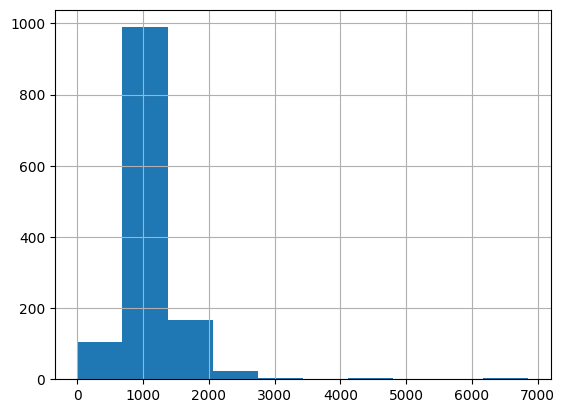

In [10]:
train['content'].str.len().hist()

<Axes: >

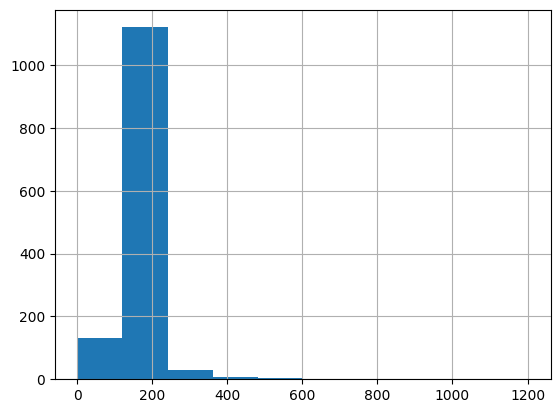

In [11]:
train['content'].str.split().map(lambda x: len(x)).hist()

<Axes: >

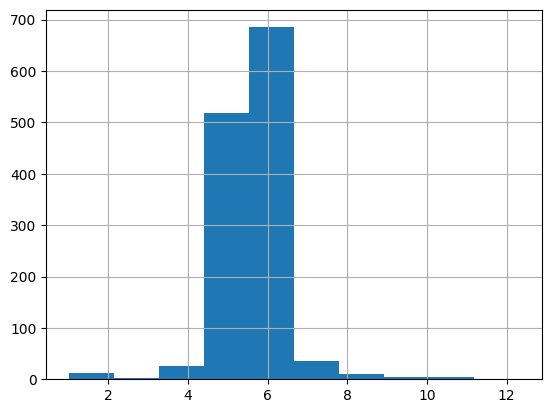

In [12]:
train['content'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
# word lengths

In [13]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

len(stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/giyaseddin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [14]:
corpus=[]
content_texts = train['content'].str.split()

content_texts = content_texts.values.tolist()
corpus = [word for i in content_texts for word in i]  # flatten
len(corpus)

231881

<Axes: >

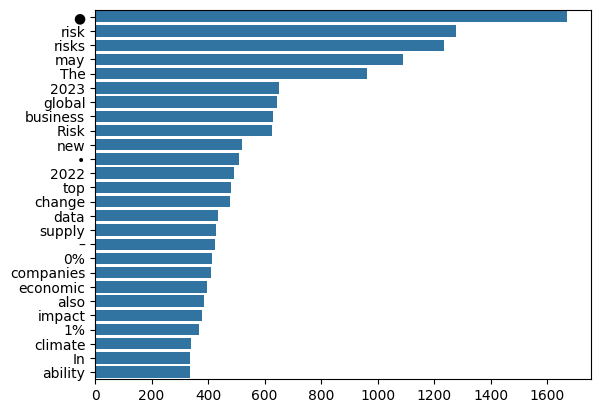

In [15]:
from collections import Counter
counter = Counter(corpus)
mostcommon = counter.most_common()

x, y= [], []
for word, count in mostcommon[:60]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

# Ngram exploration
Ngrams are simply contiguous sequences of n words. For example “riverbank”,” The three musketeers” etc.If the number of words is two, it is called bigram. For 3 words it is called a trigram and so on.

Looking at most frequent n-grams can give you a better understanding of the context in which the word was used.



In [16]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None, top=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top]


<Axes: >

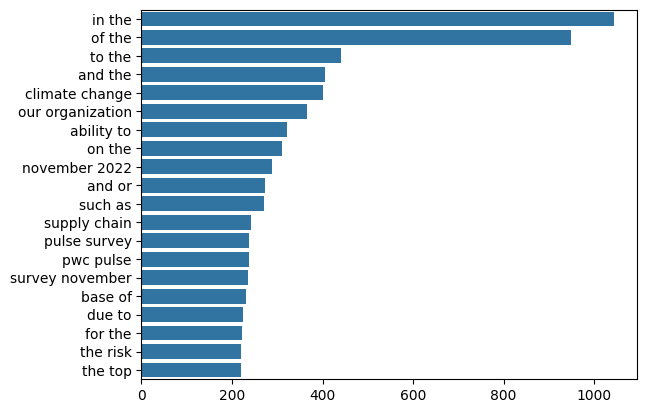

In [17]:
top_n_bigrams = get_top_ngram(train['content'], 2, top=20)

x,y = map(list, zip(*top_n_bigrams))

sns.barplot(x=y,y=x)

E.g. Supply chain and climate change are clearly present in the dataset

<Axes: >

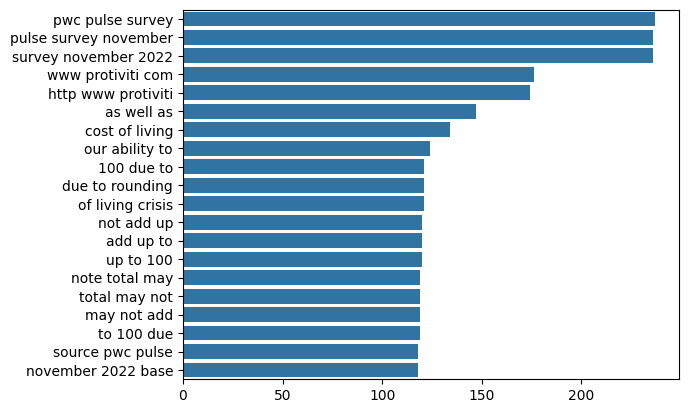

In [18]:
top_n_bigrams = get_top_ngram(train['content'],3, top=20)

x,y = map(list, zip(*top_n_bigrams))

sns.barplot(x=y,y=x)

In [19]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(series):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for content in series:
        words=[w for w in word_tokenize(content) if (w not in stopwords)]

        words=[lem.lemmatize(w) for w in words if len(w)>2]

        corpus.append(words)
    return corpus

prepr_corpus=preprocess_text(train['content'])

print(len(prepr_corpus))
prepr_corpus[:2]

[nltk_data] Downloading package punkt to /home/giyaseddin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/giyaseddin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


1300


[['All',
  'right',
  'reserved',
  'MA23-16258',
  '988982046',
  'http',
  '//www.marshmclennan.com/'],
 ['Revisiting',
  'purpose',
  'and/or',
  'value',
  'statement',
  'Refining',
  'company',
  'tell',
  'ESG',
  'story',
  'Crafting',
  'response',
  'social',
  'political',
  'issue',
  'Increasing',
  'communication',
  "company's",
  'purpose/values',
  'marketplace',
  'Collecting',
  'customer',
  'feedback',
  'Improving',
  'diversity',
  'equity',
  'inclusion',
  'effort',
  'Helping',
  'define',
  'trust',
  'strategy',
  'Refining',
  'approach',
  'consumer',
  'data',
  'privacy',
  'Unsure/NANot',
  'Somewhat',
  'Very',
  'little',
  'great',
  'extent',
  'CMO',
  'marketing',
  'leader',
  'Note',
  'Total',
  'may',
  'add',
  '100',
  'due',
  'rounding',
  'Source',
  'PwC',
  'Pulse',
  'Survey',
  'November',
  '2022',
  'base',
  '657',
  'CMO',
  'base',
  'PwC',
  'Pulse',
  'Survey',
  'November',
  '2022',
  'How',
  'much',
  'agree',
  'disagree',

# Wordcloud
Wordcloud is a great way to represent text data. The size and color of each word that appears in the wordcloud indicate it’s frequency or importance.



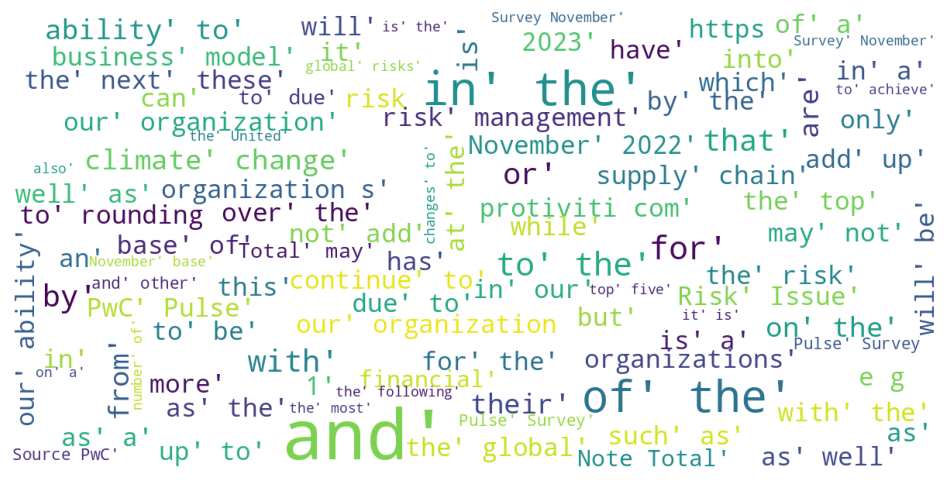

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)


# Exploring through text complexity
It can be very informative to know how readable (difficult to read) the text is and what type of reader can fully understand it. Do we need a college degree to understand the message or a first-grader can clearly see what the point is?

You can actually put a number called readability index on a document or text. Readability index is a numeric value that indicates how difficult (or easy) it is to read and understand a text.

This complexity will give me a hint on how much to expect the algirithms to understand and differentiate between the documents

<Axes: >

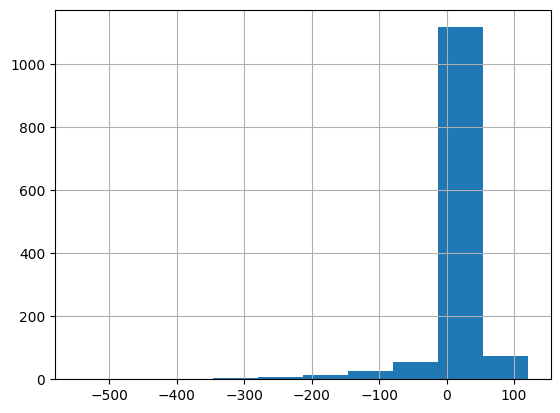

In [21]:
from textstat import flesch_reading_ease

train['content'].apply(lambda x : flesch_reading_ease(x)).hist()

<Axes: >

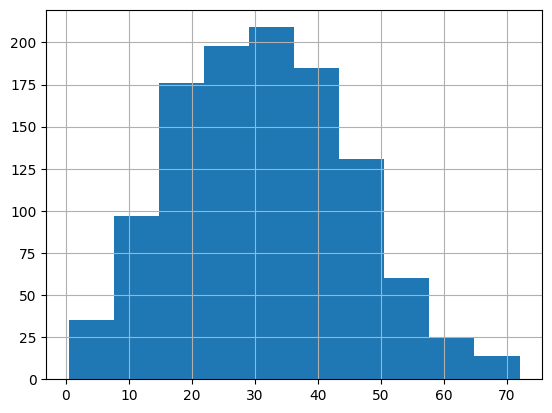

In [22]:
ease = train['content'].apply(lambda x : flesch_reading_ease(x))
ease[(ease < 100) & (ease > 0)].hist()

In [23]:
reading = train['content'].apply(lambda x : flesch_reading_ease(x))

In [24]:
x = [i for i in range(len(reading)) if reading[i]<5]
train.iloc[x]['content'].head(2).to_list()


["Revisiting our purpose and/or values statements 0% 12% 48% 40% 0%\n\nRefining how our company tells our ESG story 0% 8% 33% 56% 3%\n\nCrafting our response to social or political issues 0% 10% 45% 44% 1%\n\nIncreasing communications about the company's\npurpose/values to the marketplace 0% 10% 42% 48% 0%\n\nCollecting customer feedback 1% 11% 48% 40% 0%\n\nImproving diversity, equity and inclusion efforts 0% 15% 38% 47% 0%\n\nHelping define our trust strategy 1% 11% 40% 47% 1%\n\nRefining our approach to consumer data privacy 0% 8% 37% 55% 0%\n\nUnsure/NANot at all Somewhat\n\nVery little To a great extent\x0c\n48\n\nCMO and marketing leaders\n\n*Note: Total may not add up to 100% due to rounding.\nSource: PwC Pulse Survey, November 2, 2022: base of 657, CMO base of 73 PwC Pulse Survey - November 2022\n\nHow much do you agree or disagree with the following statements?\n\n",
 'Source: PwC Pulse Survey, November 2, 2022: base of 657, CMO base of 73 PwC Pulse Survey - November 2022\n\nH

In [25]:
train.iloc[x]['content'].to_list()[::-1][:2]

['Source: PwC Pulse Survey, November 2, 2022: base of 657, CRO base of 72 PwC Pulse Survey - November 2022\n\nHow confident are you in your company’s ability to do the following?\n\nManage exchange rate volatility 4% 11% 43% 38% 4%\n\nAchieve near-term growth goals 0% 14% 50% 35% 1%\n\nAchieve adequate and effective compliance 0% 10% 32% 58% 0%\n\nDrive down overall cost of compliance\nwhile effectively mitigating risk 6% 13% 49% 32% 1%\n\nMake an acquisition 3% 11% 40% 36% 10%\n\nExecute on overall business\ntransformation initiatives 0% 10% 49% 42% 0%\n\nFree up working capital 0% 18% 46% 36% 0%\n\nMake progress on environmental issues 1% 17% 40% 39% 3%\n\nMaintain a respectful work environment 3% 6% 32% 60% 0%\n\nPrevent “quiet quitting” 3% 14% 49% 32% 3%\n\nExit low performers 3% 21% 36% 36% 4%\n\nConfirm change initiatives deliver expected results 1% 15% 43% 40% 0%\n\nCompletely confident\n\nNot at all confident Unsure/NA\n\nSomewhat confident\n\nMostly confident\x0c\n85\n\nCRO an

Check some more examples..

In [26]:
x=[i for i in range(len(reading)) if reading[i]>20]
train.iloc[x]['content'].head(2).to_list()


['All rights reserved. MA23-16258 988982046\n\nhttps://www.marshmclennan.com/',
 'Amid ongoing strategic competition in a\nmulti-polar world and the war in Ukraine, Western\nindustrialized democracies are closer than at any\npoint in recent history. But many countries outside\nthat affiliation see it in their best interest to maintain\nneutrality.\n\nA3485140\x0c\n8© 2023 Copyright owned by one or more of the KPMG International entities.\nKPMG International entities provide no services to clients. All rights reserved.\n\nAlternative economic cooperation frameworks such as\nthe BRICS (initially a group of emerging economies:\nBrazil, Russia, India, China, and South Africa) and the\nShanghai Cooperation Organization (a political,\neconomic, and security bloc of Eurasian states) are\ngathering steam with new players looking to engage,\nfor example: Turkey, Iran, oil-rich Gulf states, as well\nas states in Asia and Africa. These same players are\nalso exploring alternatives to the dominanc